In [2]:
import os
import numpy as np
import nrrd
import h5py as h5
import matplotlib.pyplot as plt

In [3]:
path = "/Users/christian/Nextcloud/06_students/SHK/SHK_Lars_Kleinkop/exchange/200_10-layer/volumes/01/rand_subvolume/"

vol_file = "200_10-layer_01_0.vol.nrrd"
seg_file0 = "200_10-layer_01_0.0_24-07-04.pred.seg.nrrd"
seg_file1 = "200_10-layer_01_0.1_24-07-04.pred.seg.nrrd"


assert os.path.exists(os.path.join(path,vol_file))
assert os.path.exists(os.path.join(path,seg_file0))
assert os.path.exists(os.path.join(path,seg_file1))

### load the volume

In [4]:
vol , header = nrrd.read(os.path.join(path,vol_file))
seg_fill , header_seg = nrrd.read(os.path.join(path,seg_file0))
seg_weft , header_seg = nrrd.read(os.path.join(path,seg_file1))

In [5]:
print(vol.dtype)
print(vol.nbytes/1024**2)
print(vol.shape)

print(seg_fill.dtype)
print(seg_fill.nbytes/1024**2)
print(seg_fill.shape)

print(seg_weft.dtype)
print(seg_weft.nbytes/1024**2)
print(seg_weft.shape)

uint16
62.5
(500, 256, 256)
int16
62.5
(500, 256, 256)
int16
62.5
(500, 256, 256)


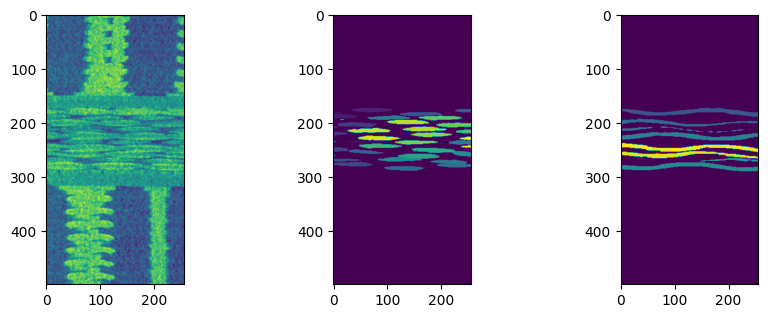

In [6]:
fig, axs = plt.subplots(1,3,figsize=(3*3.5,3.5))

axs[0].imshow(vol[:,:,18])

axs[1].imshow(seg_weft[:,:,18]) ## weft index 1
axs[2].imshow(seg_fill[:,:,18]) ## fill index 2

In [7]:
seg_weft_bin = seg_weft > 0
seg_fill_bin = seg_fill > 0

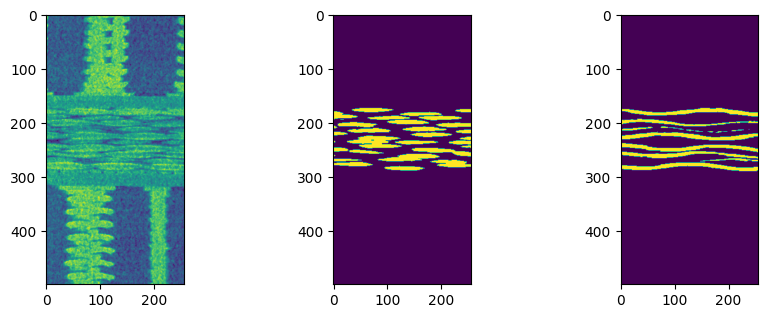

In [8]:
fig, axs = plt.subplots(1,3,figsize=(3*3.5,3.5))

axs[0].imshow(vol[:,:,18])

axs[1].imshow(seg_weft_bin[:,:,18]) ## weft index 1
axs[2].imshow(seg_fill_bin[:,:,18]) ## fill index 2

In [9]:
mask = np.zeros_like(vol)

mask[seg_weft_bin] = 1
mask[seg_fill_bin] = 2

In [10]:
vol_file.split(".")[0]

'200_10-layer_01_0'

In [11]:
fout = vol_file.split(".")[0] + ".vol.seg.h5"
print(fout)

200_10-layer_01_0.vol.seg.h5


In [12]:
out = {}
out['raw'] = vol

obj_ids = np.unique(mask)
obj_ids = obj_ids[0:]
masks = mask == obj_ids[:, None, None, None]

out['mask'] = mask
out['masks'] = masks

In [13]:
with h5.File(fout, 'w') as fout:
    for key in out.keys():
        if key == "volume_data":
            volume_group = fout.create_group('volume_data')
            for key, value in out["volume_data"].items():
                volume_group.create_dataset(key, data=value)
        else:
            fout.create_dataset(key, data = out[key],compression="gzip")